In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [258]:
Data = pd.read_csv('D3.csv',header= None)
print(Data)
M=len(Data)



           0         1         2         3
0   0.000000  3.440000  0.440000  4.387545
1   0.040404  0.134949  0.888485  2.679650
2   0.080808  0.829899  1.336970  2.968490
3   0.121212  1.524848  1.785455  3.254065
4   0.161616  2.219798  2.233939  3.536375
..       ...       ...       ...       ...
95  3.838384  1.460202  3.046061 -4.440595
96  3.878788  2.155152  3.494545 -4.458663
97  3.919192  2.850101  3.943030 -4.479995
98  3.959596  3.545051  0.391515 -3.304593
99  4.000000  0.240000  0.840000 -5.332455

[100 rows x 4 columns]


In [259]:
X1 = Data.values[:, 0] # First explanatory variable
X2 = Data.values[:, 1] # Second explanatory variable 
X3 = Data.values[:, 2] # Third explanatroy variable
Y = Data.values[:, 3] # Results of explanatory variables
m = len(Y) # Number of training examples
num = list(range(1,m+1))

print('m = ', m)

m =  100


In [260]:
# Matrix used later for size compliance
X_0 = np.ones((m, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [261]:
# Using reshape function convert X 1D array to 2D array of dimension 97x1
X_1 = X1.reshape(m, 1)
X_1[:5]

array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616]])

In [262]:
X_2 = X2.reshape(m, 1)
X_2[:5]

array([[3.44      ],
       [0.13494949],
       [0.82989899],
       [1.52484848],
       [2.21979798]])

In [263]:
X_3 = X3.reshape(m, 1)
X_3[:5]

array([[0.44      ],
       [0.88848485],
       [1.3369697 ],
       [1.78545455],
       [2.23393939]])

In [264]:
# Cumulative X
X = np.hstack((X_0, X_1, X_2, X_3))
X[:5]

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.13494949, 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545455],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [265]:
X1_1 = np.hstack((X_0, X_1))
X1_1[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [266]:
X2_2 = np.hstack((X_0, X_2))
X2_2[:5]

array([[1.        , 3.44      ],
       [1.        , 0.13494949],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798]])

In [267]:
X3_3 = np.hstack((X_0, X_3))
X3_3[:5]

array([[1.        , 0.44      ],
       [1.        , 0.88848485],
       [1.        , 1.3369697 ],
       [1.        , 1.78545455],
       [1.        , 2.23393939]])

In [268]:
theta = np.zeros(2)
theta

array([0., 0.])

In [269]:
def compute_cost(X, Y, theta):
 predictions = X.dot(theta)
 errors = np.subtract(predictions, Y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J

In [270]:
def gradient_descent(X, Y, theta, alpha, iterations):

 cost_history = np.zeros(iterations)
 for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sum_delta = (alpha / m) * X.transpose().dot(errors);
    theta = theta - sum_delta;
    cost_history[i] = compute_cost(X, Y, theta)
 return theta, cost_history

In [271]:
theta = [0., 0.]
iterations = 2500;
alpha = 0.01;
itx = list(range(1,iterations+1))

In [272]:
# Theta for Explanatory variable 1
theta1, cost_history1 = gradient_descent(X1_1, Y, theta, alpha, iterations)
print('Final value of theta =', theta1)
print('cost_history =', cost_history1)

Final value of theta = [ 5.90516418 -2.0294687 ]
cost_history = [5.48226715 5.44290965 5.40604087 ... 0.9850599  0.98505961 0.98505931]


In [273]:
# Theta for Explanatory variable 2
theta2, cost_history2 = gradient_descent(X2_2, Y, theta, alpha, iterations)
print('Final value of theta =', theta2)
print('cost_history =', cost_history2)

Final value of theta = [0.73430056 0.55829257]
cost_history = [5.29831663 5.09909109 4.92356115 ... 3.59936642 3.59936642 3.59936641]


In [274]:
# Theta for Explanatory variable 3
theta3, cost_history3 = gradient_descent(X3_3, Y, theta, alpha, iterations)
print('Final value of theta =', theta3)
print('cost_history =', cost_history3)

Final value of theta = [ 2.86184509 -0.51669523]
cost_history = [5.40768785 5.30397076 5.21178297 ... 3.62946316 3.6294631  3.62946305]


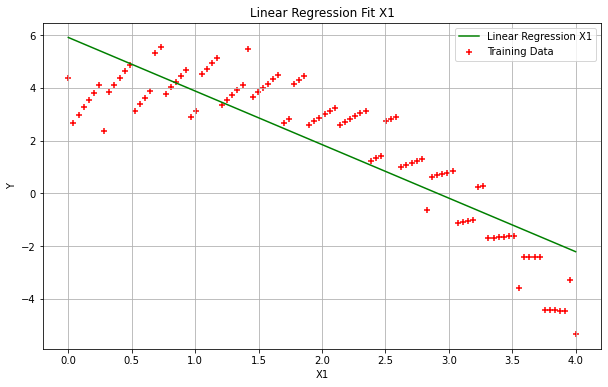

In [275]:
# Varible X1
plt.scatter(X1_1[:, 1], Y, color='red', marker= '+', label= 'Training Data')
plt.plot(X1_1[:, 1],X1_1.dot(theta1), color='green', label='Linear Regression X1')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Linear Regression Fit X1')
plt.legend()

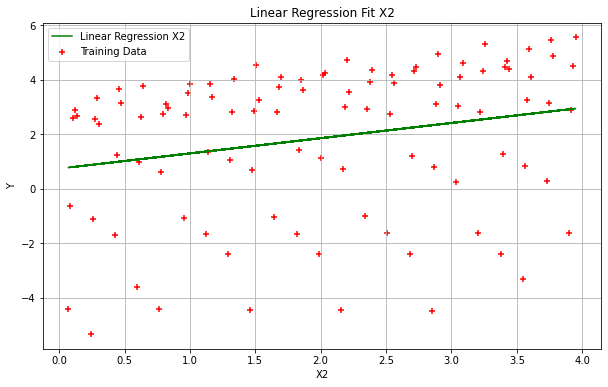

In [276]:
# Variable X2
plt.scatter(X2_2[:, 1], Y, color='red', marker= '+', label= 'Training Data')
plt.plot(X2_2[:, 1],X2_2.dot(theta2), color='green', label='Linear Regression X2')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Linear Regression Fit X2')
plt.legend()

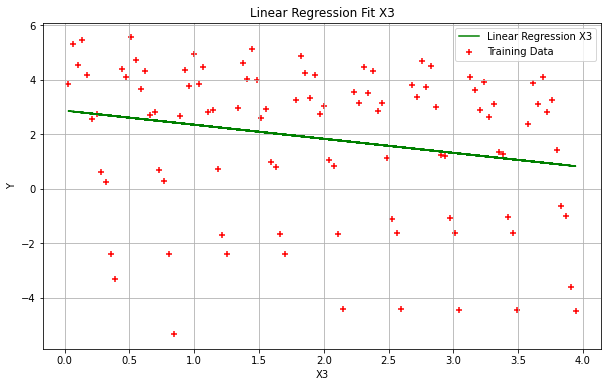

In [277]:
# Variable X3
plt.scatter(X3_3[:, 1], Y, color='red', marker= '+', label= 'Training Data')
plt.plot(X3_3[:, 1],X3_3.dot(theta3), color='green', label='Linear Regression X3')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Linear Regression Fit X3')
plt.legend()

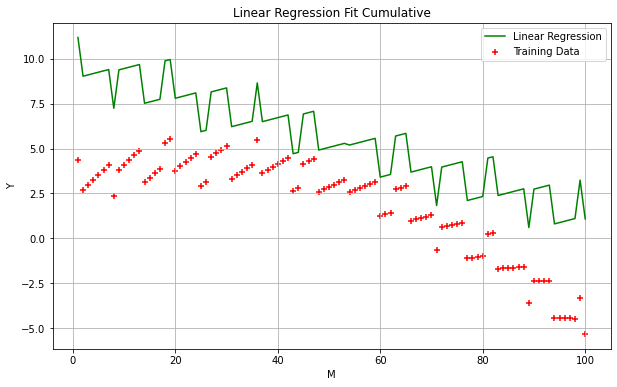

In [278]:
# All three variables
plt.scatter(num, Y, color='red', marker= '+', label= 'Training Data')
plt.plot(num,(X1_1.dot(theta1)+X2_2.dot(theta2)+X3_3.dot(theta3)), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('M')
plt.ylabel('Y')
plt.title('Linear Regression Fit Cumulative')
plt.legend()

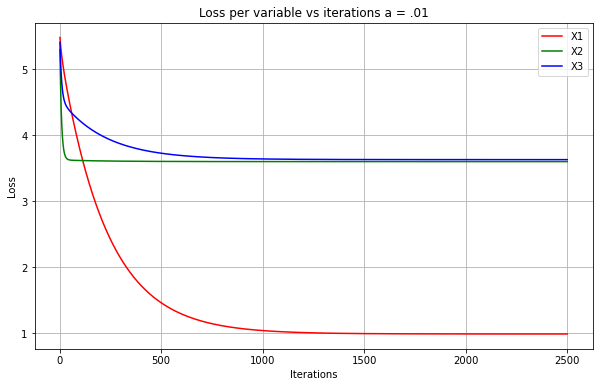

In [279]:
# Loss of three variables
plt.plot(itx, cost_history1, color='red',  label= 'X1')
plt.plot(itx, cost_history2, color='green', label='X2')
plt.plot(itx, cost_history3, color='blue', label='X3')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss per variable vs iterations a = .01')
plt.legend()

In [280]:
# Problem 2. cumulative variable regression 

P2theta = np.zeros(4)

# Theta and costs for cumulative explanatory variables
thetaP2, cost_historyP2 = gradient_descent(X, Y, P2theta, alpha, iterations)
print('Final value of theta =', thetaP2)
print('cost_history =', cost_historyP2)

Final value of theta = [ 4.88518623 -1.94311861  0.60344978 -0.20272198]
cost_history = [5.21542243 4.97171977 4.7765543  ... 0.74830606 0.74828645 0.74826687]


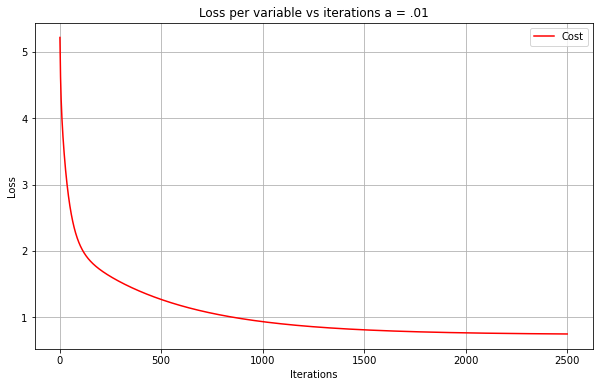

In [281]:
# Loss of three variables
plt.plot(itx, cost_historyP2, color='red',  label= 'Cost')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss per variable vs iterations a = .01')
plt.legend()

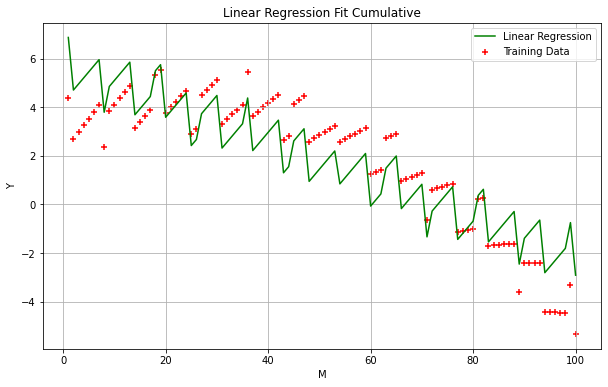

In [282]:
# All three variables
plt.scatter(num, Y, color='red', marker= '+', label= 'Training Data')
plt.plot(num,(X.dot(thetaP2)), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('M')
plt.ylabel('Y')
plt.title('Linear Regression Fit Cumulative')
plt.legend()

In [283]:
# Put test values into the linear model
Test = np.array([[1, 1, 1, 1], [1, 2, 0, 4], [1, 3, 2, 1]])
h = Test.dot(thetaP2)
print(h)


[3.34279542 0.1880611  0.06000798]
